# Una Introducción a Pandas

Esta libreta es una modificación (sin muchos cambios) de la introducción a Pandas realizada por Julians Evans y que se encuentra dentro de la (documentación oficial de Pandas)[https://github.com/jvns/pandas-cookbook], Unas cosas se redujeron, y otras se dejaron en forma de ejercicios para practicar diferentes cosas.

In [1]:
# Figuras en linea
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)      # Tamaño de las gráficas

matplotlib.style.use('ggplot')



# 1. Un ejemplo con bicicletas

## 1.1 Leyendo datos de un archivo csv

Para leer archivos CSV, se utiliza la función `read_csv`. Por default se asume la coma como el indicador de separación. Vamos a ver un conjunto de datos sobre [ciclistas en la ciudad de Montreal](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage). Los cuales se encuentran ya descargados. Esta base de datos describe la cantidad de ciclistas que transitaron por 7 diferentes rutas por día.

In [2]:
broken_df = pd.read_csv('bikes.csv')

In [3]:
# Vamos a ver las 3 primeras entradas
broken_df[:4]



,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;


Ups! Así, los datos no son útiles. Afortunadamente, `read_csv` viene con un montón de opciones para ajustarse a los diferentes archivos CSV. En particular es necesario:

* cambiar el indicador de columna por  `;`
* Cambiar la codificación por `'latin1'` (por default es `'utf8'`)
* Transformar los datos de la columna `Date` a algun tipo estandar `datetime`  
* Avisar que el estilo de los datos es francés (como en español) esto es día/mes/año
* Hacer que el índice sea la columna `Date`

In [42]:
fixed_df = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
#fixed_df[:4]
#significa desde el renglon 2 hasta (6-1)
fixed_df[2:6]
#fixed_df.ix[a:b,c:d]
    #donde a=renglon inicial, b=renglon final-1
    #c=columna inicial, d=columna final-1
    
df1 = fixed_df.ix[2:6,3:6]
print df1



            Maisonneuve 1  Maisonneuve 2  du Parc
Date                                             
2012-01-03            104            248       89
2012-01-04            116            318      111
2012-01-05            124            330       97
2012-01-06             98            244       86


In [5]:
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


## 1.2 Seleccionar columnas

In [26]:
#fixed_df['Berri 1']
#fixed_df.columns

##para resultados entre 30 y 40 de la columna Berri 1
fixed_df.loc[(fixed_df["Berri 1"] > 30) & (fixed_df["Berri 1"]<40) ]  


,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-14,32,NaN,0,54,56,19,0,1,NaN


 1.3 Graficar datos

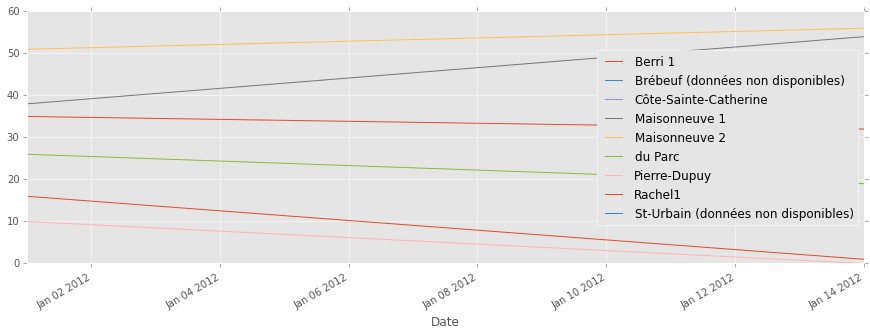

In [28]:
#fixed_df['Berri 1'].plot()
fixed_df.loc[(fixed_df["Berri 1"] > 30) & (fixed_df["Berri 1"]<40) ].plot()

Igualmente se pueden graficar todos los días al mismo tiempo. Para ver mejor habrá que hacer un poco más grande la figura. Si bien es poco lo que se puede sacar de conclusión en este gráfico, se puede observar que el comportamiento de todos los caminos son más o menos parecidos. Igualmente, por las estacones, podríamos asociar de alguna manera el comportaiento de los ciclistas con el clima.

In [ ]:
fixed_df.plot(figsize=(15, 10))

### Ejercicio1 (20 puntos): Grafica 3 rutas únicamente desde la entrada 130 a la 160 (los días del verano)

los datos a graficar son:
            Maisonneuve 1  Maisonneuve 2  du Parc
Date                                             
2012-05-10           2130           4056     2075
2012-05-11           3663           5713     2888
2012-05-12           2429           3894     1805
2012-05-13           1703           3086     1592
2012-05-14           4402           7006     3868
2012-05-15           3144           5088     2650
2012-05-16           3681           5882     3057
2012-05-17           4182           6551     3408
2012-05-18           4415           6646     3196
2012-05-19           2807           4673     1966
2012-05-20           2730           4462     2182
2012-05-21           2672           4169     2044
2012-05-22           1847           2599     1610
2012-05-23           4407           7281     3737
2012-05-24           4600           7600     3792
2012-05-25           4096           6734     3341
2012-05-26           2936           4991     2373
2012-05-27           257

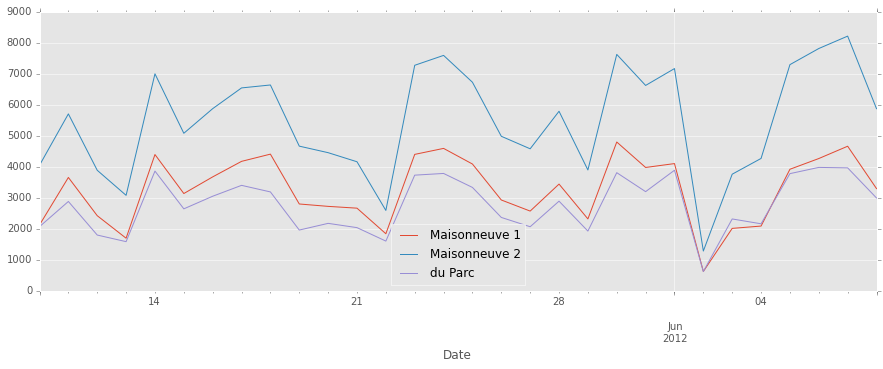

In [45]:
# Escribe aquí tu código
#
print "los datos a graficar son:"
df1 = fixed_df.ix[130:160,3:6]
print df1
df1 = fixed_df.ix[130:160,3:6].plot()


## 1.4 Extraer una columna y transformar el índice (fecha)

Supongamos ahora que tenemos la siguiente pregunta ¿Que día de la semana la gente circula más por el trayecto *Berri 1* (una ciclovía al lado de una calle principal de Montreal). Bueno, lo que tendríamos que hacer es extraer la columna que nos interesa como un nuevo *DataFrame* y luego agregarle una nueva variable como es el día de la semana.

Primero copiemos físicamente la coluna que nos interesa

In [46]:
berri_bikes = fixed_df[['Berri 1']].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Ahora tenemos que malipular las fechas, las cuales se encuentran en el índice del *DataFrame*

In [47]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10', 
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name=u'Date', length=310, freq=None, tz=None)

Curioso que lo que se registró solo llego hasta el 5 de noviembre del 2012 ¿Verdad? Ahora podemos usar las facilidades que nos dá Pandas para manipular fechas. Por ejemplo, si queremos el día del mes:

In [48]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

y si queremos el día de la semana:

In [49]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

Ahora agregamos una nueva variable a nuestro *DataFrame* de manera bastante intuitiva

In [50]:
berri_bikes.loc[:, u'Día de la semana'] = berri_bikes.index.weekday
berri_bikes.head()

,Berri 1,Día de la semana
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## 1.5 Agregación de información

Ahora nos falta agregar la información, y para eso vamos a utilizar el método `.groupby` de la clase *DataFrame*, el cual es muy parecido al que se usa en SQL. Veamos como se utiliza en forma básica, pero revisa la [documentación](http://pandas.pydata.org/pandas-docs/stable/groupby.html), ya que es una herramienta muy poderosa para el análisis y tratamiento de los datos.

In [51]:
paseos_por_dia = berri_bikes.groupby(u'Día de la semana').aggregate(sum)
paseos_por_dia

,Berri 1
Día de la semana,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


¿Días de la semana de 0 a 6? Eso no tiene mucho sentido si queremos seguir usando esta información para análisis posteriores. Es una buena práctica procurar que todas las columnas tengan nombres significativos, y que los valores se codifiquen de una manera que sean claros.

In [52]:
paseos_por_dia.index = ['Lunes', 'Martes', u'Miércoles', 'Jueves', 'Viernes', u'Sábado', 'Domingo']
paseos_por_dia

,Berri 1
Lunes,134298
Martes,135305
Miércoles,152972
Jueves,160131
Viernes,141771
Sábado,101578
Domingo,99310


¡Mejor! Y mucho mejor si lo visualizamos como una gráfica:

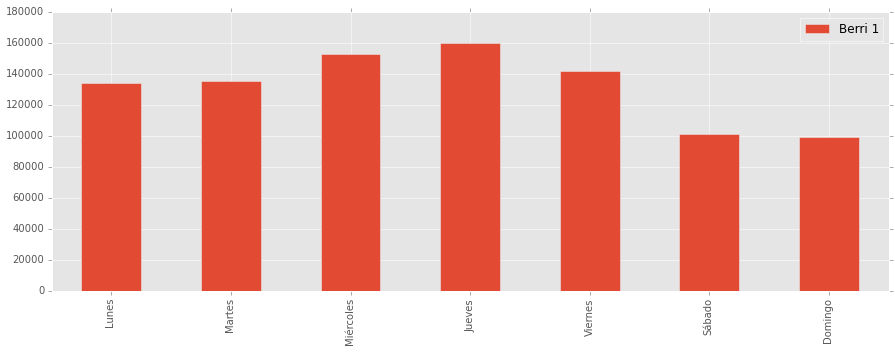

In [53]:
paseos_por_dia.plot(kind='bar')

Alguien podría argumentar que las cuentas totales no es la mejor manera que representar lo que pasa en cada día, porque la variabilidad podría ser factor importante. Como la observación nos parece válida, hagámos el análisis de otra manera.

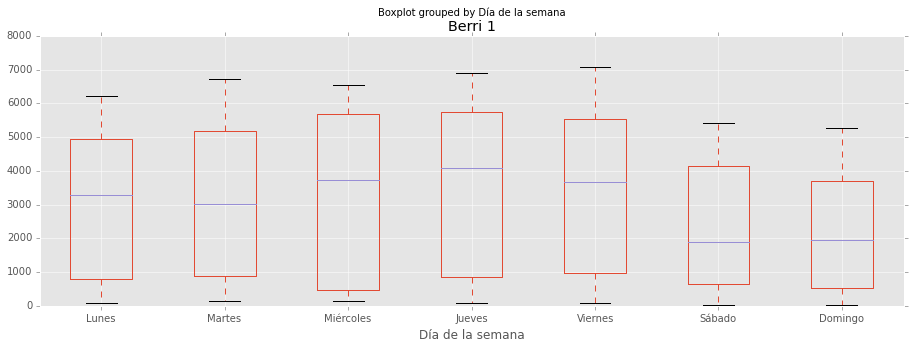

In [54]:
berri_bikes.replace({u'Día de la semana': {0:'Lunes', 1:'Martes', 2:u'Miércoles', 3:'Jueves', 
                                           4:'Viernes', 5:u'Sábado', 6:'Domingo'}}, inplace=True)

berri_bikes.boxplot(column=u'Berri 1', by=u'Día de la semana', 
                    positions= [7, 4, 1, 2, 3, 6, 5])         # Las posiciones es para mantener el orden alfabético



Estas gráficas se conocen como *Box Plots* y son muy útiles para visualizar la distribución de datos. La línea roja representa la mediana (o quantil 50) la cajita es el rango en que se encuentran el 90% de los valores, y las líneas representan los valores mínimos y máximos.

### Ejercicio2 (20 puntos): Responde a la pregunta ¿Que tanto sale la gente a andar en bicicleta por Montreal por més del año en el 2012?

            Berri 1
Date               
2012-01-01       35
2012-01-02       83
2012-01-03      135
2012-01-04      144
2012-01-05      197
DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10', 
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name=u'Date', length=310, freq=None, tz=None)
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5
  5  

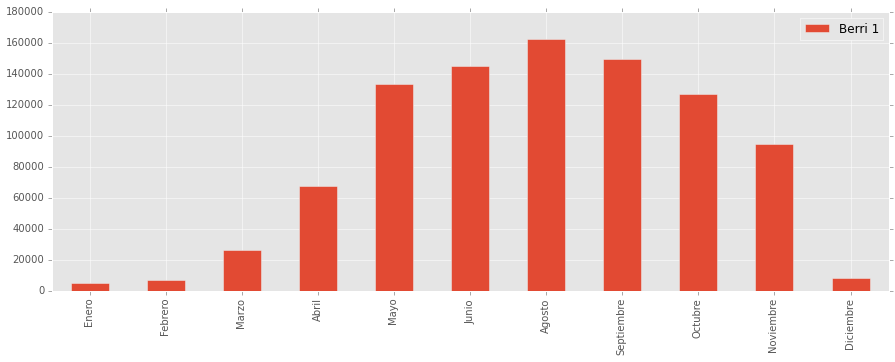

In [72]:
# Agrega todo tu código aqui, no es necesario hacerlo por partes

montreal_bikes = fixed_df[['Berri 1']].copy()
print montreal_bikes.head()

print montreal_bikes.index
print montreal_bikes.index.month

montreal_bikes.loc[:, u'Mes '] = montreal_bikes.index.month
print montreal_bikes.head()

paseos_por_mes = montreal_bikes.groupby(u'Mes ').aggregate(sum)
print paseos_por_mes


paseos_por_mes.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', u'Junio', 'Agosto', 'Septiembre', 'Octubre','Noviembre','Diciembre']
print paseos_por_mes
paseos_por_mes.plot(kind='bar')

# 2. Ahora un ejercicio con el clima en Montreal

## 2.1 Obteniendo datos de la red

Ahora vamos a revisar el clima en el mismo año del 2012 en Montreal. Así que vamos a accesar al sitio que guarda la
[información histórica del clima en Canada](http://climate.weather.gc.ca/index_e.html#access), y vamos a obtener la información del mes de marzo del 2012 (revisa el sitio si quieres ver como se determinó el *request*.

In [73]:
# Para obtener strings con formato, donde va un valor a ser sustituido se pone entre llaves
# como en url_template para {year} y para {month}

url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url = url_template.format(month=3, year=2012)

clima_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', 
                              parse_dates=True, encoding='latin1')

clima_mar2012.head(10)

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 05:00:00,2012,3,1,05:00,,-5.3,NaN,-7.9,NaN,82,...,NaN,2.4,NaN,100.58,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 06:00:00,2012,3,1,06:00,,-5.2,NaN,-7.8,NaN,82,...,NaN,4.0,NaN,100.57,NaN,NaN,NaN,-14,NaN,Snow
2012-03-01 07:00:00,2012,3,1,07:00,,-4.9,NaN,-7.4,NaN,83,...,NaN,1.6,NaN,100.59,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 08:00:00,2012,3,1,08:00,,-5.0,NaN,-7.5,NaN,83,...,NaN,1.2,NaN,100.59,NaN,NaN,NaN,-13,NaN,Snow


Muy interesante que para descargar datos de internet se utilice exactamente la misma función que para abrir un archivo local. Otra cosa importante es que sabíamos bastantes cosas del conjunto de datos, como que los primeros 15 renglones del archivo serín metadatos que no nos interesan, que esta codificado en `latin1`, y que l primer columna es de tipo `DateTime` con un formato estandar.

Ahora queda modificar el nombre de las variables para que tengan sentido para nosotros: 

In [74]:
clima_mar2012.columns = [
    u'Año', u'Mes', u'Dia', u'Hora', u'Calidad del dato', u'Temp (C)', 
    u'Temp Flag', u'Temp. de punto de rocío (C)', u'Temp. de punto de rocío Flag', 
    u'Humedad relativa (%)', u'Humedad relativa Flag', u'Dirección viento (10s deg)', u'Dirección viento Flag', 
    u'Velocidad viento (km/h)', u'Velocidad viento Flag', u'Visibilidad (km)', u'Visibilidad Flag',
    u'Presión ambiental (kPa)', u'Presión ambiental Flag', u'Hmdx', u'Hmdx Flag', u'Factor de viento', 
    u'Factor de viento Flag', u'Clima']

clima_mar2012.describe()

,Año,Mes,Dia,Temp (C),Temp Flag,Temp. de punto de rocío (C),Temp. de punto de rocío Flag,Humedad relativa (%),Humedad relativa Flag,Dirección viento (10s deg),Dirección viento Flag,Velocidad viento (km/h),Visibilidad (km),Visibilidad Flag,Presión ambiental (kPa),Presión ambiental Flag,Hmdx,Hmdx Flag,Factor de viento
count,744,744,744.000000,744.000000,0,744.000000,0,744.000000,0,715.000000,0,744.000000,744.000000,0,744.000000,0,12.000000,0,242.000000
mean,2012,3,16.000000,3.121237,NaN,-3.488575,NaN,64.862903,NaN,17.787413,NaN,14.514785,26.177957,NaN,101.335255,NaN,26.000000,NaN,-10.690083
std,0,0,8.950289,7.808771,NaN,8.293714,NaN,19.478739,NaN,11.265555,NaN,9.282456,14.213380,NaN,0.844718,NaN,1.044466,NaN,5.300809
min,2012,3,1.000000,-16.200000,NaN,-22.600000,NaN,18.000000,NaN,1.000000,NaN,0.000000,0.200000,NaN,98.670000,NaN,25.000000,NaN,-27.000000
25%,2012,3,8.000000,-2.025000,NaN,-9.000000,NaN,51.000000,NaN,5.000000,NaN,7.000000,24.100000,NaN,100.867500,NaN,25.000000,NaN,-13.000000
50%,2012,3,16.000000,2.600000,NaN,-2.500000,NaN,63.500000,NaN,21.000000,NaN,13.000000,25.000000,NaN,101.480000,NaN,26.000000,NaN,-10.000000
75%,2012,3,24.000000,7.600000,NaN,1.650000,NaN,82.000000,NaN,27.000000,NaN,19.000000,25.000000,NaN,101.882500,NaN,27.000000,NaN,-7.000000
max,2012,3,31.000000,25.500000,NaN,12.800000,NaN,100.000000,NaN,36.000000,NaN,63.000000,48.300000,NaN,103.120000,NaN,28.000000,NaN,-1.000000


## 2.2 Reducción de los datos

Como podemos ver, varias de las columnas tienen puros valores tipo `NaN`, que en Pandas significa que el valor es faltante. Por el momento estas columnas vamos a eliminarlas de un tajo utilizando la función `dropna`.

Igualmente, si el índice ya incluye fecha y hora, las columnas extras que representan Año, mes, día y hora pues son redundantes y también los vamos a eliminar, utilizando la función `drop`. Igualmente para la columna de calidad del dato que no parece tener información relevante. En ambos casos usamos la opción `axix=1` lo que significa que solamente queremos eliminar columnas.

In [75]:
clima_mar2012 = clima_mar2012.dropna(axis=1, how='any')
clima_mar2012 = clima_mar2012.drop([u'Año', u'Mes', u'Dia', u'Hora', u'Calidad del dato'], axis=1)
clima_mar2012.head(10)

,Temp (C),Temp. de punto de rocío (C),Humedad relativa (%),Velocidad viento (km/h),Visibilidad (km),Presión ambiental (kPa),Clima
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow
2012-03-01 05:00:00,-5.3,-7.9,82,33,2.4,100.58,Snow
2012-03-01 06:00:00,-5.2,-7.8,82,33,4.0,100.57,Snow
2012-03-01 07:00:00,-4.9,-7.4,83,30,1.6,100.59,Snow
2012-03-01 08:00:00,-5.0,-7.5,83,32,1.2,100.59,Snow


y ahora solo para ver que es lo que pasa, vamos a revisar la temperatura promedio por hora del día durante todo el més de marzo de 2012.

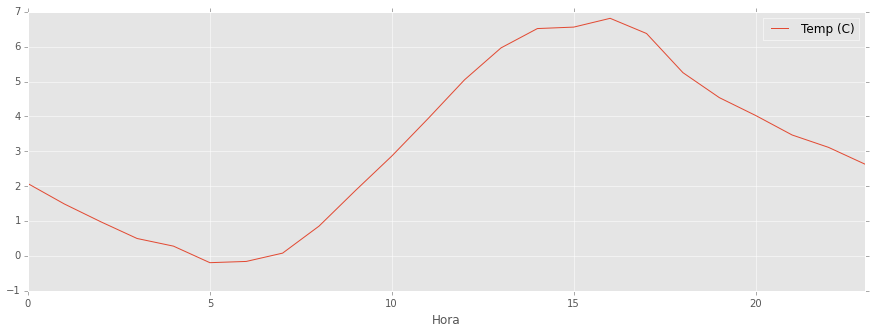

In [76]:
temperatura = clima_mar2012[[u'Temp (C)']].copy()
temperatura.loc[:, u'Hora'] = clima_mar2012.index.hour
temperatura.groupby(u'Hora').aggregate(np.mean).plot()

## 2.3 Obteniendo y combinando archivos históricos

Ahora el objetivo es descargar los datos del clima a lo largo de todo el 2012. Para esto vamos a hacer una función en python que nos permita automatizar la tarea. 


In [77]:
def descarga_mensual(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    df = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True)
    df = df.dropna(axis=1)
    df = df.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return df

La función tiene un detallito, que es que cuando se pide el mes de enero, hay que pedirlo de un año adelante porque si no, pues nos regresa la información del mes pasado. Esto es un error del sistema canadiense de datos históricos de clima.

Con esto, podemos recoger todos los meses en una lista de `DataFrames` y luego concatenarlas en el sentido de los renglones:

In [78]:
lista_meses = [descarga_mensual(2012, mes) for mes in range(1, 13)]
clima2012 = pd.concat(lista_meses)
clima2012.columns = [u'Temp (C)', u'Temp. de punto de rocío (C)',  u'Humedad relativa (%)', 
                     u'Velocidad viento (km/h)',  u'Visibilidad (km)', u'Factor de viento', u'Clima']

clima2012.describe()

,Temp (C),Temp. de punto de rocío (C),Humedad relativa (%),Velocidad viento (km/h),Visibilidad (km),Factor de viento
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.761646,2.537602,67.549408,14.917805,27.777561,101.077563
std,11.870757,11.125876,17.206340,8.733108,12.549831,0.848113
min,-27.100000,-34.100000,18.000000,0.000000,0.200000,97.070000
25%,0.400000,-5.500000,55.000000,9.000000,24.100000,100.590000
50%,9.300000,3.500000,68.000000,13.000000,25.000000,101.100000
75%,18.800000,11.800000,82.000000,20.000000,25.000000,101.620000
max,33.000000,24.400000,100.000000,69.000000,48.300000,103.650000


Tenemos 8784 entradas, que para no volver a tener que leer de internet vamos a guardar en nuestro propio archivo CSV.

In [82]:
clima2012.to_csv('clima2012.csv', encoding='latin1')

## 2.4 Operaciones con cadenas de caracteres

Vamos ahora a graficar la temperatura promedio mensual, utilizando el método `resample`:

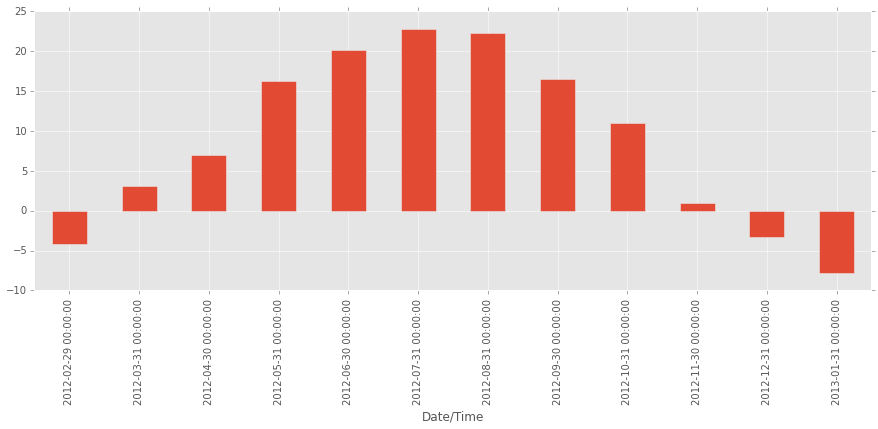

In [83]:
clima2012['Temp (C)'].resample('M', how=np.mean).plot(kind='bar')

Y ahora quisieramos poder visualizar si la temperatura tiene un comportamiento parecido al número de veces que nevó en un mes (claro, en este caso es algo bastante obvio, ya que es un ejemplo ilustrativo).

Para esto, vamos a utilizar la columna Clima de nuestro `DataFrame`, en la cual, en cada momento, hay información en forma de cadenas de caracteres con las situaciones que se presentaron (niebla, lluvia, nieve, ...). Para esto utilizaremos el método `str.contains`, el cual devuelve `True` en caso que la cadena de caracteres se encuentre el el `DataFrame`. Sin embargo, si queremos saber el número de veces que nevó en un mes, es necesario convertir esa variable booleana en una variable numerica (flotante). Para eso utilizaremos el comando `astype`. Vamos a ponerlo todo en una sola linea.

In [84]:
nevando = clima2012[u'Clima'].str.contains('Snow').astype(float).resample('M', how=np.mean)

Y ahora los ponemos junto a la temperatura para hacer una gráfica conjunta.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF03BA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F1CC6D8>], dtype=object)

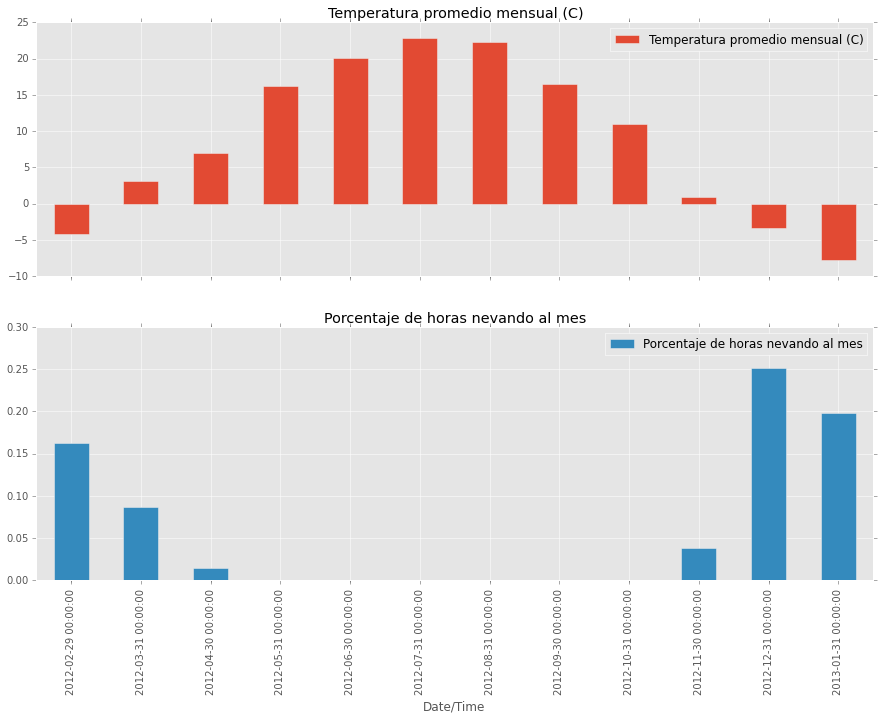

In [85]:
temperatura = clima2012[u'Temp (C)'].resample('M', how=np.mean)
temperatura.name = "Temperatura promedio mensual (C)"
nevando.name = "Porcentaje de horas nevando al mes"

pd.concat([temperatura, nevando], axis=1).plot(kind='bar', subplots=True, figsize=(15, 10))

### Ejercicio 3 (30 puntos): Verifica si la lluvia tiene alguna relación con la velocidad del viento, o con la humedad relativa 

In [ ]:
# Escribe aqui tu código

### Ejercicio 4 (30 puntos): Mezcla las bases de clima y la de las bicicletas, para revisar si hay alguna relación entre alguna variable climática y el uso de la bicicleta como medio de transporte

In [ ]:
# Escribe aqui tu código